**First we shall import the needed libraries and define the training and testing data. We import with pandas because of its ease and then we use numpy because of its familiarity.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

path = "/kaggle/input/digit-recognizer/"

train = pd.read_csv(path + "train.csv").values
test = pd.read_csv(path + "test.csv").values

x_train = train[:,1:].reshape(42000,28,28)
y_train = train[:,0]
x_test = test.reshape(28000,28,28)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**We have reshaped the data just so we can check that indeed digits are drawn in the images. Further on we will use flattened arrays for the first layer of the neural network input.**

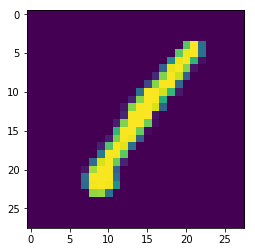

1


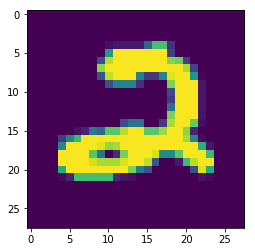

In [2]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

plt.imshow(x_test[0])
plt.show()

**We must normalize the image data so it is between 0 and 1. Further on we will try to train the same model but without normalizing the image data to show the influence of normalization.**

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

**We construct the neural network model.**

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation="relu")) #Hidden layer 1 with RELU activation function.
model.add(tf.keras.layers.Dense(128, activation="relu")) #Hidden layer 2 with RELU activation function.
model.add(tf.keras.layers.Dense(10, activation="softmax")) #Output layer with softmax activation function instead of RELU. This is done because the output
                                                            # is a density probability function so softmax is more appropriate.

**We can now compile the model. For the loss metric we use the crossentropy.**

In [5]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

**Now we fit the model to our training data. We train for 1 epoch and every time check the validation loss and accuracy of our model to test we are not overfitting the data.**

**We also divide our training data into two parts. One is meant for training and the other for validation purposes.**

In [6]:
epochs = 10
val_loss = np.zeros(epochs)
val_acc = np.zeros(epochs)
train_loss = np.zeros(epochs)
train_acc = np.zeros(epochs)

print(x_train.shape)

x_val = x_train[40000:]
y_val = y_train[40000:]

x_train = x_train[:40000]
y_train = y_train[:40000]

for e in range(1, epochs+1):
    print("Fit " + str(e))
    hist = model.fit(x_train, y_train, epochs=1)
    train_loss[e-1] = hist.history["loss"][0]
    train_acc[e-1] = hist.history["acc"][0]    
    print("Validate " + str(e))
    val_loss[e-1], val_acc[e-1] = model.evaluate(x_val, y_val)
    
tf.keras.backend.clear_session()

(42000, 28, 28)
Fit 1
40000/40000 [==============================] - 5s 117us/sample - loss: 0.3179 - acc: 0.9083
Validate 1
2000/2000 [==============================] - 0s 52us/sample - loss: 0.1800 - acc: 0.9430
Fit 2
40000/40000 [==============================] - 4s 104us/sample - loss: 0.1307 - acc: 0.9597
Validate 2
2000/2000 [==============================] - 0s 42us/sample - loss: 0.1349 - acc: 0.9580
Fit 3
40000/40000 [==============================] - 4s 110us/sample - loss: 0.0862 - acc: 0.9734
Validate 3
2000/2000 [==============================] - 0s 41us/sample - loss: 0.1462 - acc: 0.9535
Fit 4
40000/40000 [==============================] - 5s 113us/sample - loss: 0.0616 - acc: 0.9804
Validate 4
2000/2000 [==============================] - 0s 41us/sample - loss: 0.1361 - acc: 0.9605
Fit 5
40000/40000 [==============================] - 5s 117us/sample - loss: 0.0470 - acc: 0.9852
Validate 5
2000/2000 [==============================] - 0s 40us/sample - loss: 0.1220 - acc: 0

**We plot the dependencies of accuracies and loss as a function of model iteration times.**

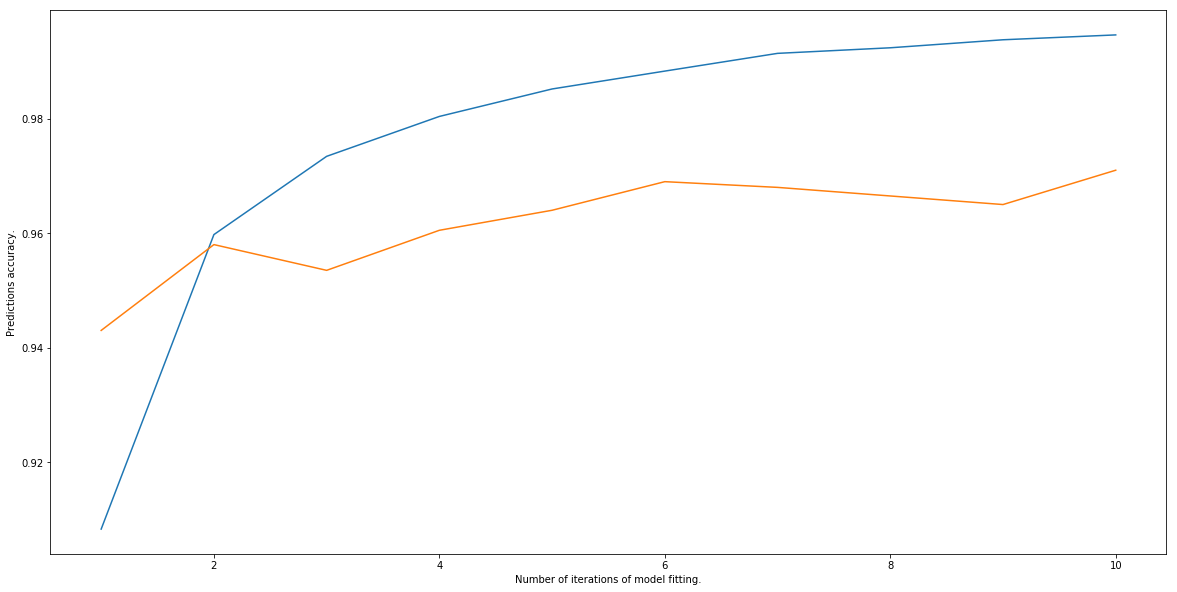

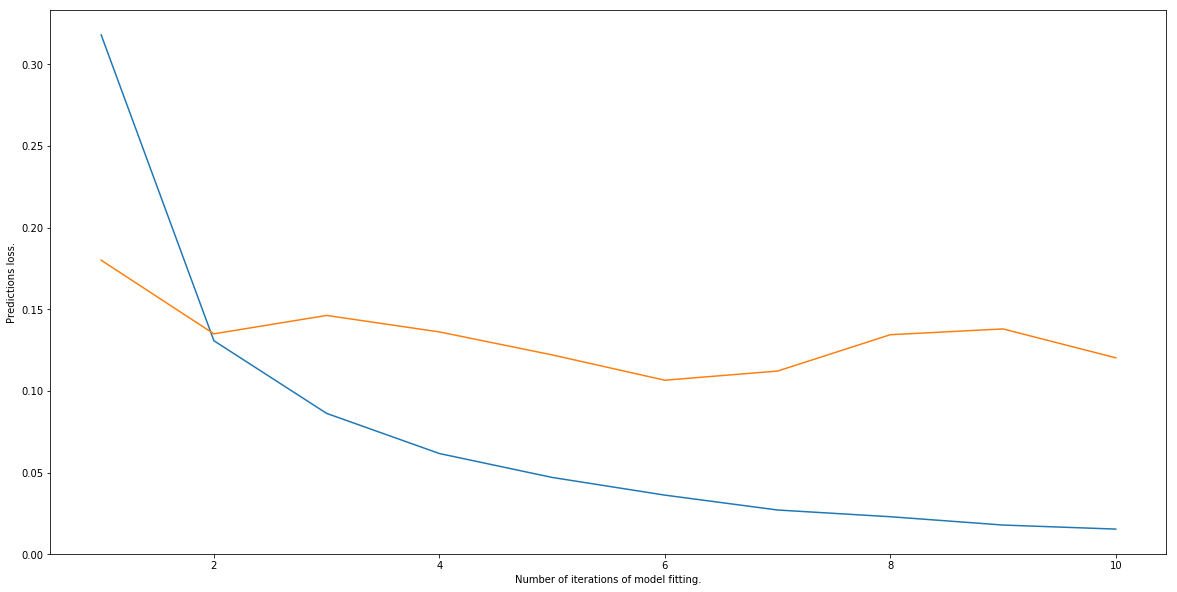

In [7]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, epochs+1), train_acc)
plt.plot(np.arange(1, epochs+1), val_acc)
plt.xlabel("Number of iterations of model fitting.")
plt.ylabel("Predictions accuracy.")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(np.arange(1, epochs+1), train_loss)
plt.plot(np.arange(1, epochs+1), val_loss)
plt.xlabel("Number of iterations of model fitting.")
plt.ylabel("Predictions loss.")
plt.show()

**We can see that the number of iterations needed is around 6. We use this for our predictions. First we re-train the model with the full dataset.**

In [18]:
x_train = train[:,1:].reshape(42000,28,28)
y_train = train[:,0]

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #input layer
model.add(tf.keras.layers.Dense(128, activation="relu")) #Hidden layer 1 with RELU activation function.
model.add(tf.keras.layers.Dense(128, activation="relu")) #Hidden layer 2 with RELU activation function.
model.add(tf.keras.layers.Dense(10, activation="softmax")) #Output layer with softmax activation function instead of RELU. This is done because the output
                                                            # is a density probability function so softmax is more appropriate.
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
42000/42000 [==============================] - 5s 118us/sample - loss: 0.3076 - acc: 0.9116
Epoch 2/6
42000/42000 [==============================] - 5s 116us/sample - loss: 0.1263 - acc: 0.9607
Epoch 3/6
42000/42000 [==============================] - 5s 113us/sample - loss: 0.0855 - acc: 0.9729
Epoch 4/6
42000/42000 [==============================] - 5s 117us/sample - loss: 0.0614 - acc: 0.9809
Epoch 5/6
42000/42000 [==============================] - 5s 117us/sample - loss: 0.0476 - acc: 0.9846
Epoch 6/6
42000/42000 [==============================] - 5s 111us/sample - loss: 0.0357 - acc: 0.9881


**Now we do the predictions of the testing images.**

In [37]:
pred = model.predict(x_test)
pred.shape

prediction = np.zeros((pred.shape[0],2),dtype = int)

for i in range(pred.shape[0]):
    prediction[i, 0] = i+1
    prediction[i, 1] = np.argmax(pred[i])
    
np.savetxt("./prediction.csv", prediction, delimiter=",")

In [41]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame(data = prediction, columns=('ImageID', "Label"))

# create a link to download the dataframe
create_download_link(df)